In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

pd.set_option('display.max_columns',200)
np.random.seed(24)

In [2]:
df=pd.read_csv('For_modeling.csv')

In [3]:
df.shape

(9601139, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


In [5]:
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,4.923152e+06,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.841734e+06,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,2.466320e+06,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,4.921318e+06,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,7.389176e+06,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,9.830310e+06,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [7]:
df[df['Distance']<0].shape

(0, 26)

In [8]:
df[df['Distance']<0].head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust


In [9]:
df[df['Haversine']==0].shape

(955083, 26)

In [10]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.0,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,26,18,1600,37.556610,126.898018,37.556610,126.898018,0.0,1,1,0,8,0,1,1,0,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,140,2,10,37.575970,126.983063,37.575970,126.983063,0.0,1,1,0,37,0,1,1,0,40,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,161,43,1940,37.548222,127.067879,37.548222,127.067879,0.0,1,1,0,43,0,1,1,1,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,208,13,490,37.609566,126.930977,37.609566,126.930977,0.0,1,1,0,51,0,1,1,1,5,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [11]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.550830e+05,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.0,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000
mean,4.660921e+06,49.878425,5741.102458,37.546596,126.989714,37.546596,126.989714,0.0,7.367401,15.648030,15.695371,29.346679,3.190157,7.368260,15.646774,15.795307,29.606122,3.191605,20.290335,0.015202,1.937013,51.137753,0.896492,0.007591,23.291317,32.303018
std,2.697950e+06,30.473000,5351.125553,0.045334,0.084399,0.045334,0.084399,0.0,2.556475,8.761283,5.232936,17.260827,2.066626,2.556467,8.761114,5.831401,17.347721,2.069881,8.441664,0.309063,0.961516,17.037958,0.991830,0.143294,11.826363,23.582992
min,0.000000e+00,2.000000,1.000000,37.437271,126.798599,37.437271,126.798599,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,2.304694e+06,26.000000,1720.000000,37.514088,126.918503,37.514088,126.918503,0.0,5.000000,8.000000,13.000000,14.000000,1.000000,5.000000,8.000000,13.000000,15.000000,1.000000,15.700000,0.000000,1.200000,38.000000,0.000000,0.000000,15.800000,16.000000
50%,4.642039e+06,47.000000,3990.000000,37.542816,126.995476,37.542816,126.995476,0.0,8.000000,16.000000,17.000000,29.000000,3.000000,8.000000,16.000000,17.000000,29.000000,3.000000,21.600000,0.000000,1.800000,50.000000,0.510000,0.000000,23.300000,27.000000
75%,6.903436e+06,69.000000,8320.000000,37.572113,127.062424,37.572113,127.062424,0.0,9.000000,23.000000,20.000000,44.000000,5.000000,9.000000,23.000000,20.000000,45.000000,5.000000,26.300000,0.000000,2.600000,63.000000,1.680000,0.000000,30.300000,42.000000
max,9.830310e+06,119.000000,33290.000000,37.689720,127.180267,37.689720,127.180267,0.0,12.000000,31.000000,23.000000,59.000000,6.000000,12.000000,31.000000,23.000000,59.000000,6.000000,39.400000,35.000000,7.400000,98.000000,3.520000,8.800000,62.200000,304.000000


In [12]:
df[df['Distance']==0].shape

(0, 26)

In [13]:
filtered_df = df.loc[(df['Distance'] == 0) &
                      (df['Haversine'] == 0) &
                      (df['Pmonth'] == df['Dmonth']) &
                      (df['Pday'] == df['Dday']) &
                      (df['Phour'] == df['Dhour']) &
                      (df['Pmin'] == df['Dmin']) &
                      (df['PDweek'] == df['DDweek'])]

# Print the filtered DataFrame
filtered_df

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust


In [14]:
filtered_df.shape

(0, 26)

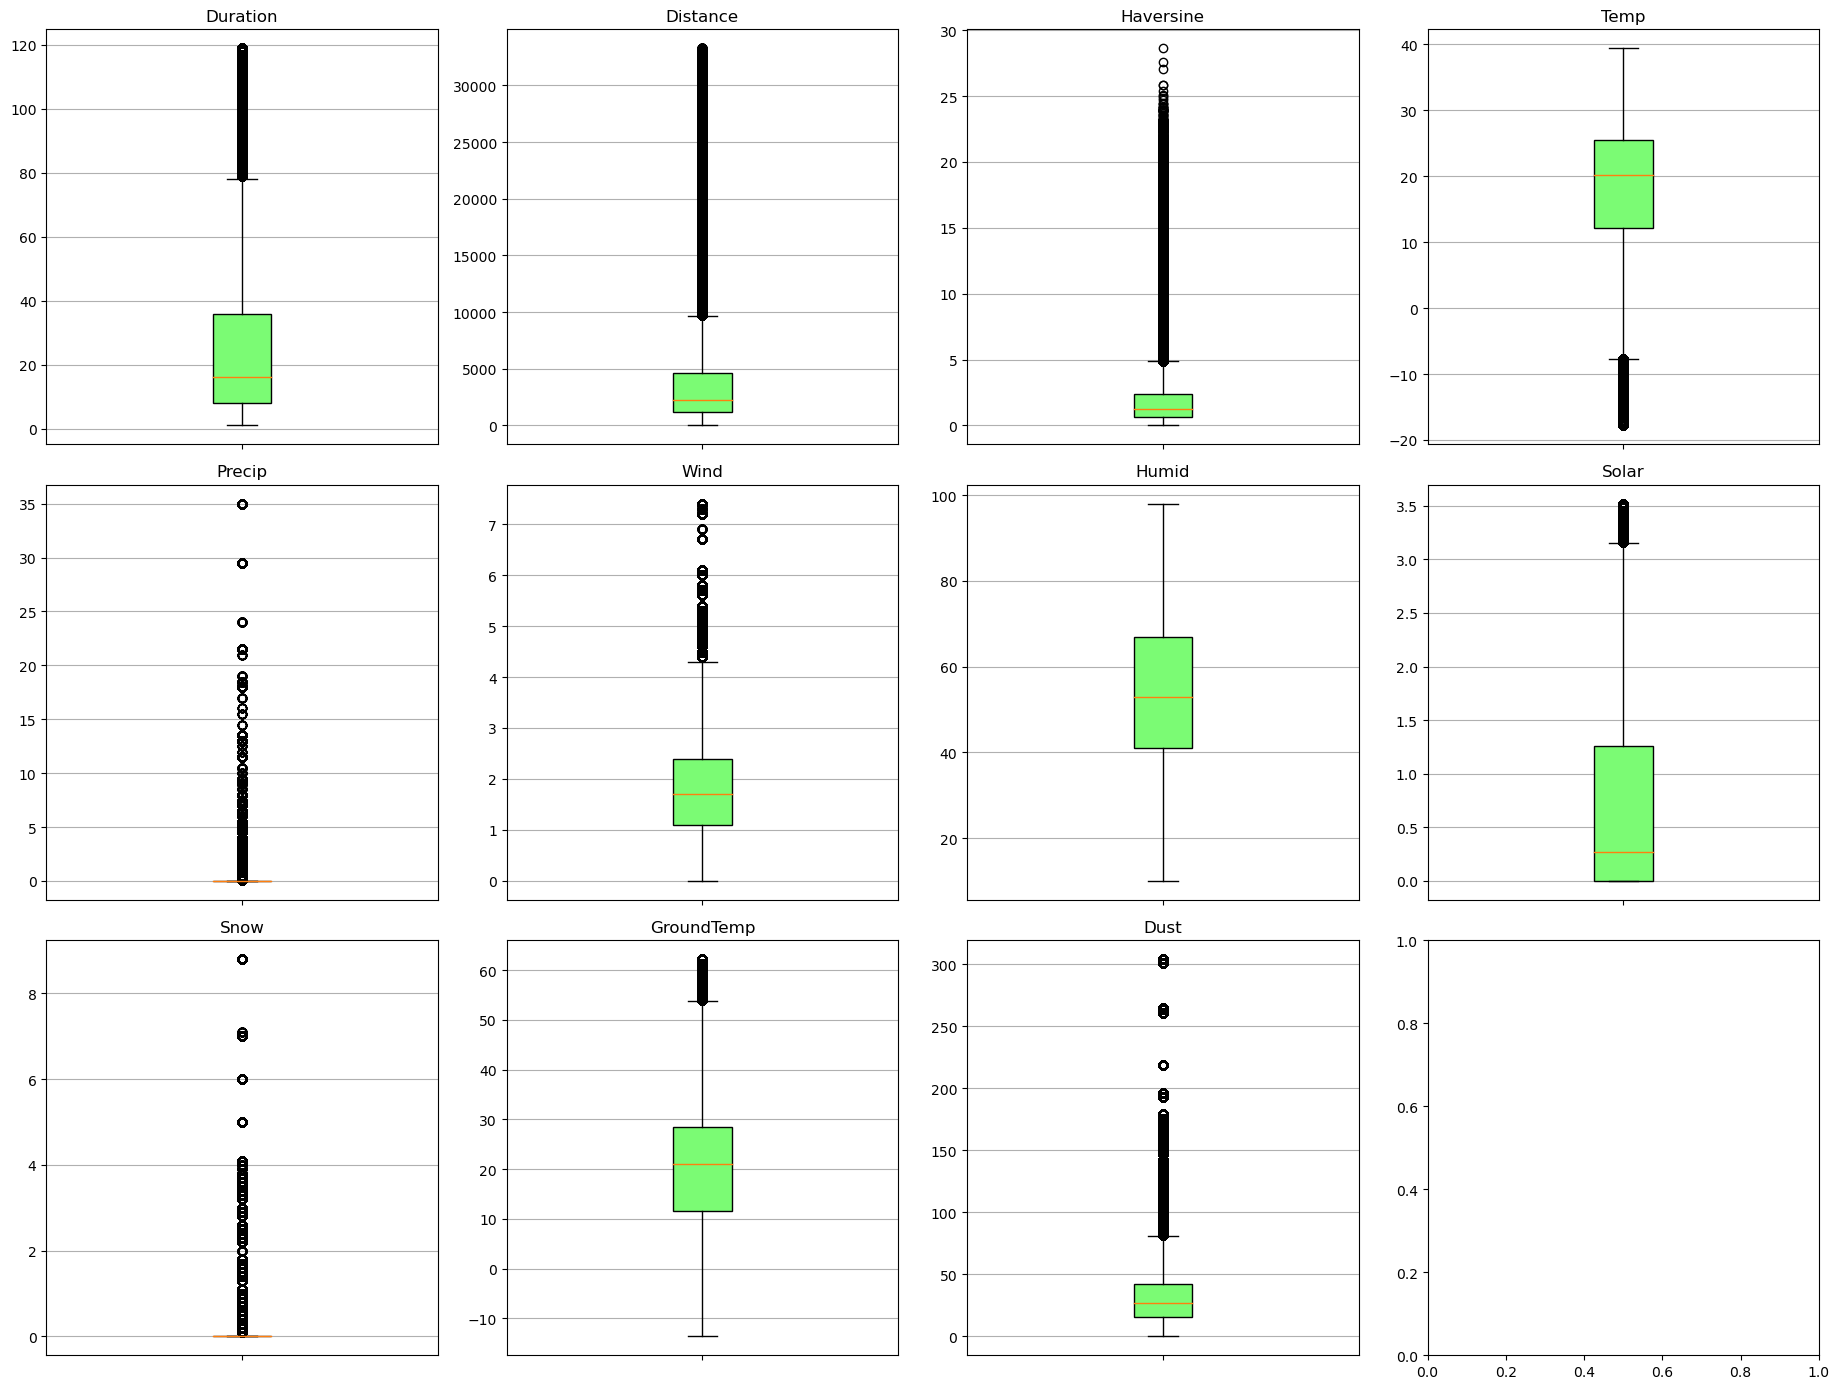

In [15]:
num_vars = ['Duration', 'Distance', 'Haversine','Temp','Precip', 'Wind', 'Humid', 'Solar', 'Snow','GroundTemp', 'Dust'] 

fig, axes = plt.subplots(nrows=3,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('#7BFB74')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

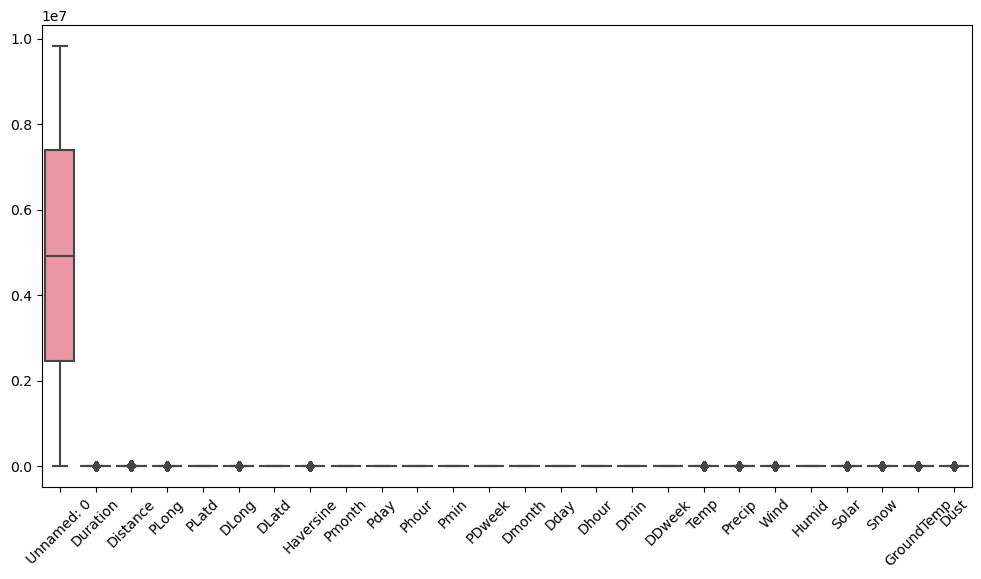

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=df.select_dtypes(include=[np.number]),
    ax=ax
)
plt.xticks(rotation=45)
plt.show()

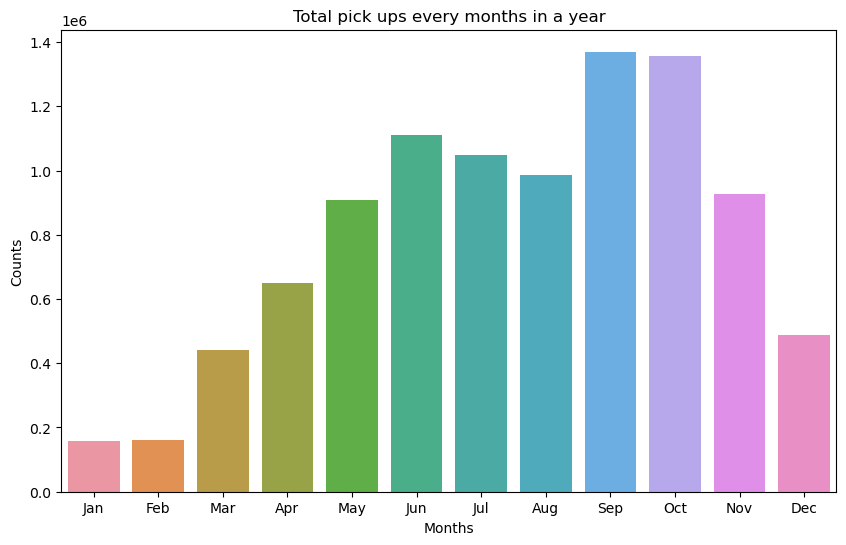

In [17]:
# Total pick ups every months in a year
pivot_table1 = df.pivot_table(index='Pmonth', aggfunc={'Pmonth': 'count'})

month_map ={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
pivot_table1.index = pivot_table1.index.map(month_map)

# Get the pick-up months and trip counts
pick_up_months = pivot_table1.index.to_numpy()
trips_count = pivot_table1['Pmonth'].to_numpy()

plt.figure(figsize=(10,6))
sns.barplot(x=pick_up_months,y=trips_count)
plt.xlabel("Months")
plt.ylabel("Counts")
plt.title("Total pick ups every months in a year")
plt.show()

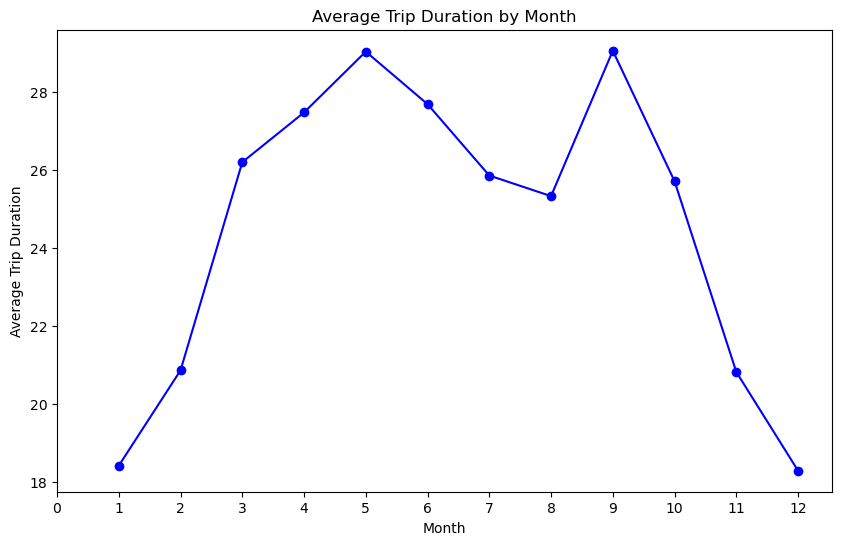

In [18]:
# Calculate average trip duration by month
df_avg_duration_by_month = df.groupby(['Pmonth'])['Duration'].mean()

# Plot average trip duration by month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_month.index, df_avg_duration_by_month.values,'b-o')
plt.xlabel('Month')
plt.xticks(range(len(df_avg_duration_by_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month')
plt.show()

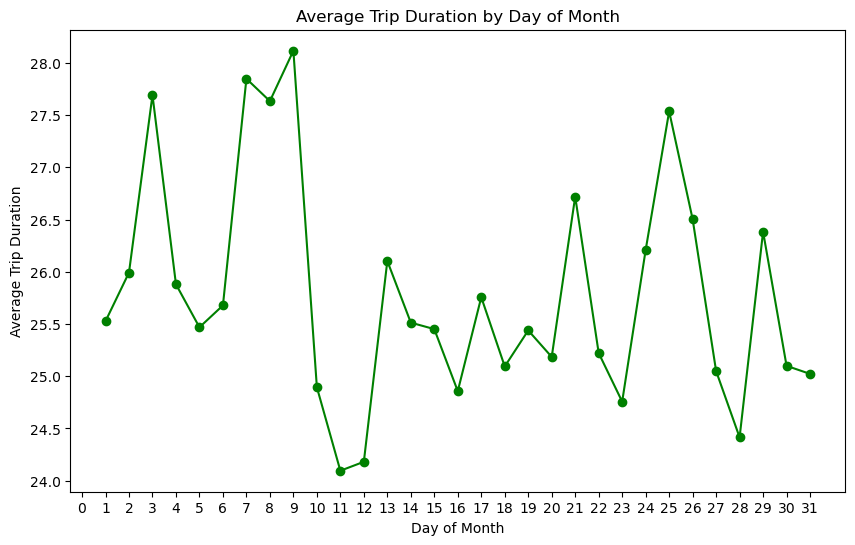

In [19]:
# Calculate average trip duration by day of the month
df_avg_duration_by_day_of_month = df.groupby(['Pday'])['Duration'].mean()

# Plot average trip duration by day of the month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_month.index, df_avg_duration_by_day_of_month.values,'g-o')
plt.xlabel('Day of Month')
plt.xticks(range(len(df_avg_duration_by_day_of_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Month')
plt.show()

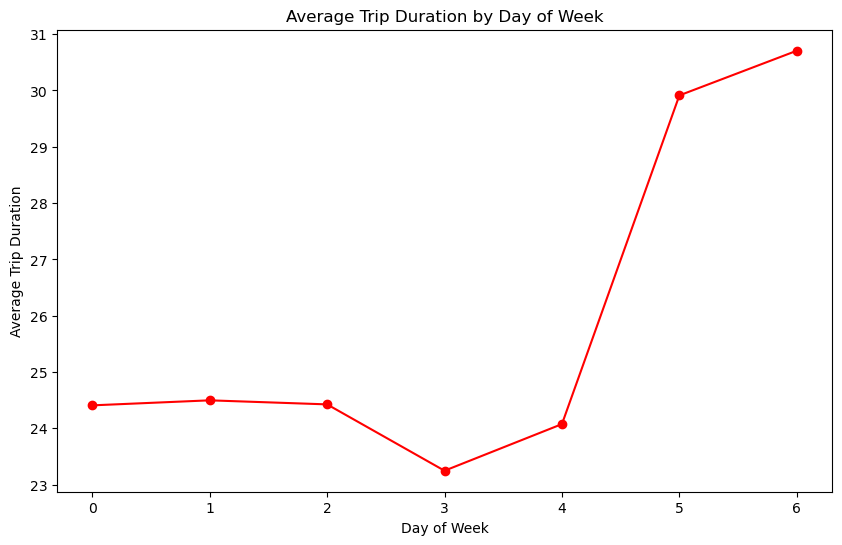

In [20]:
# Calculate average trip duration by day of the week
df_avg_duration_by_day_of_week = df.groupby(['PDweek'])['Duration'].mean()

# Plot average trip duration by day of the week
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_week.index, df_avg_duration_by_day_of_week.values,'r-o')
plt.xlabel('Day of Week')
plt.xticks(range(len(df_avg_duration_by_day_of_week.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Week')
plt.show()

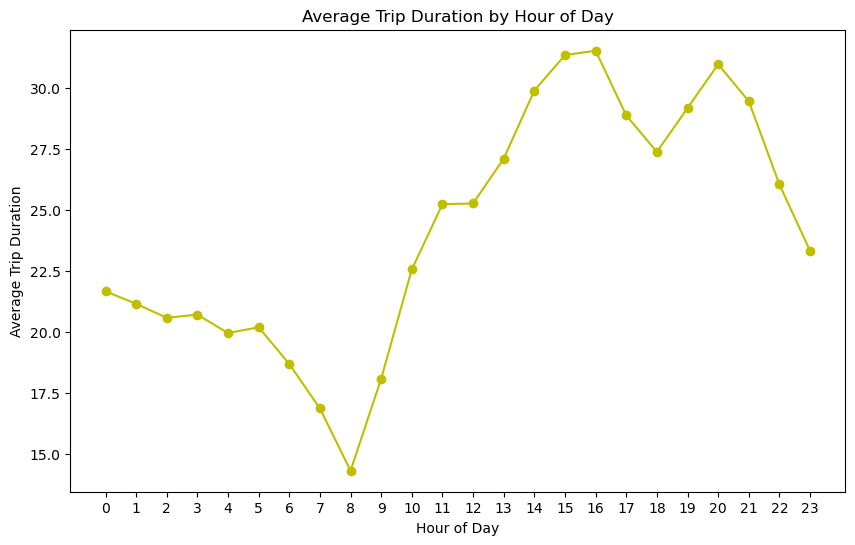

In [21]:
# Calculate average trip duration by hour of the day
df_avg_duration_by_hour_of_day = df.groupby(['Phour'])['Duration'].mean()

# Plot average trip duration by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_hour_of_day.index, df_avg_duration_by_hour_of_day.values,'y-o')
plt.xlabel('Hour of Day')
plt.xticks(range(len(df_avg_duration_by_hour_of_day.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of Day')
plt.show()

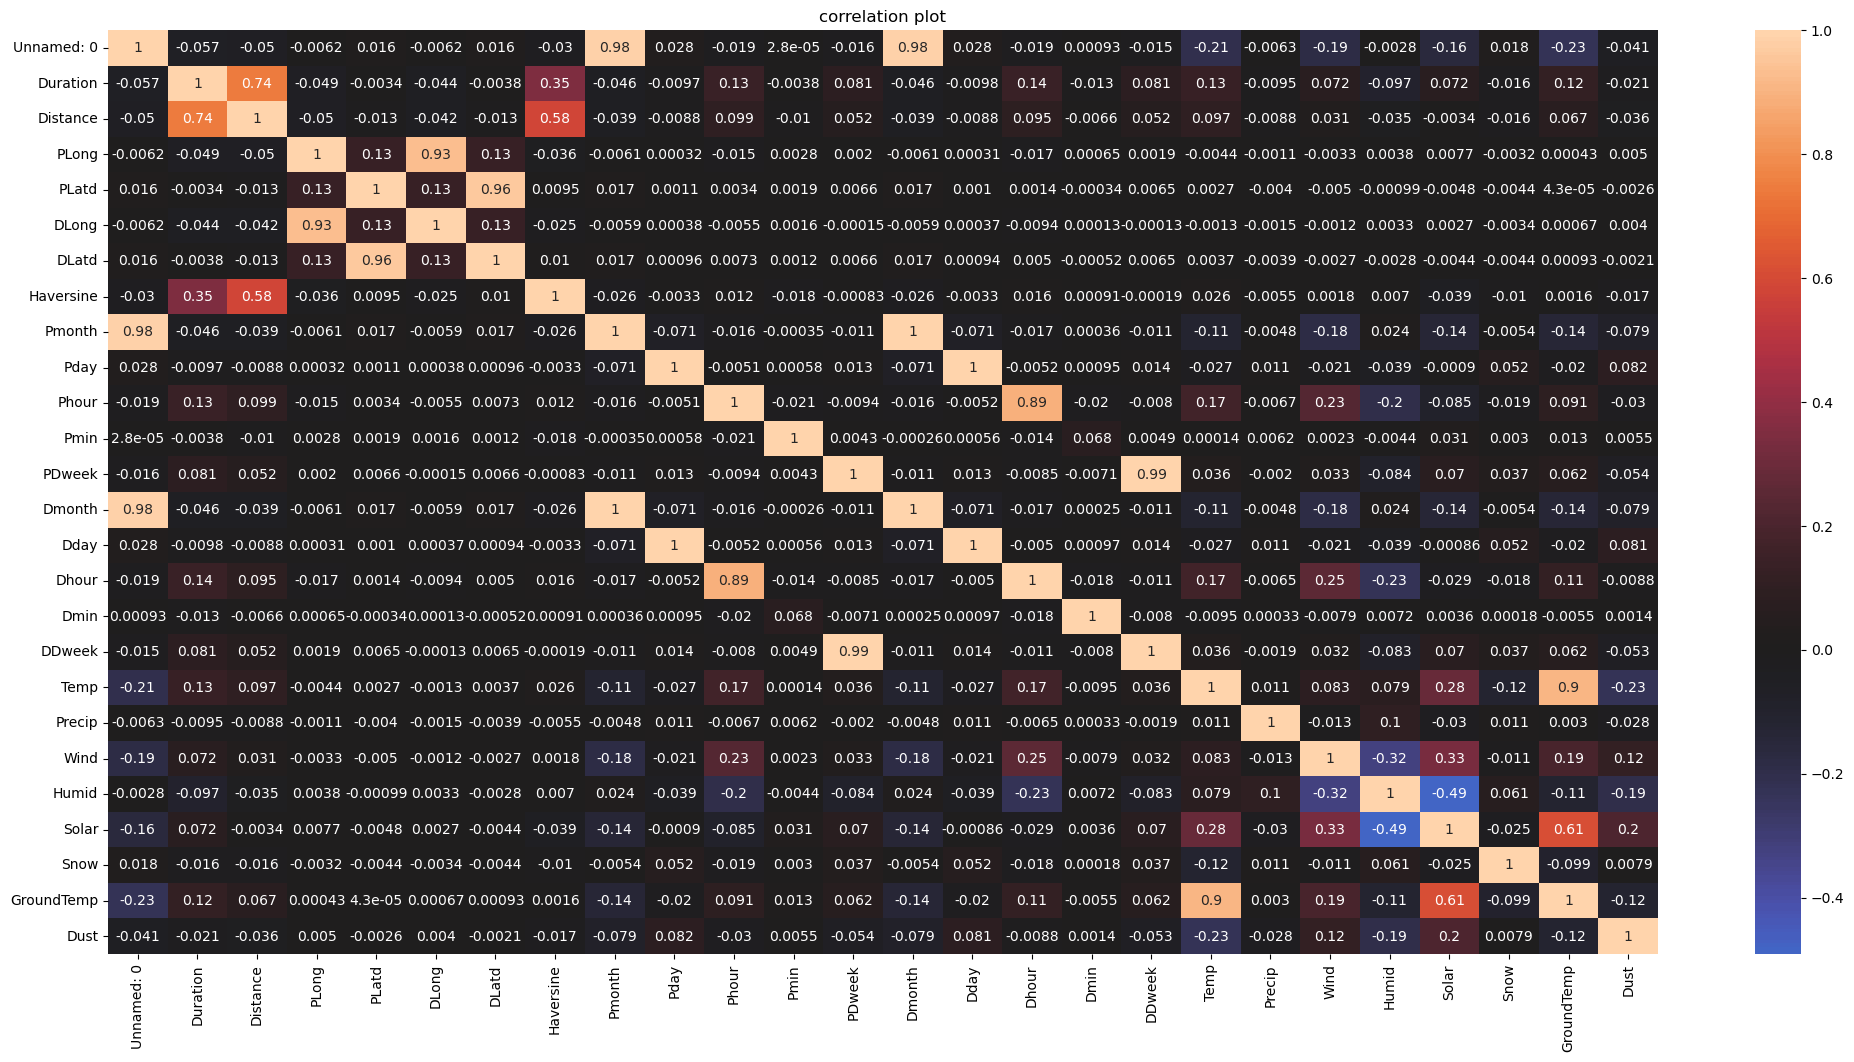

In [22]:
plt.figure(figsize = (25,12))
sns.heatmap(df.corr(),annot=True,center=0)
plt.title("correlation plot")
plt.show()

In [23]:
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [24]:
df.shape

(9601139, 26)

In [25]:
df.dropna()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601134,9830306,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,23,43,0,1,1,0,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,9830307,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,23,54,0,1,1,0,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,22,59,0,1,1,0,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,23,55,0,1,1,1,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


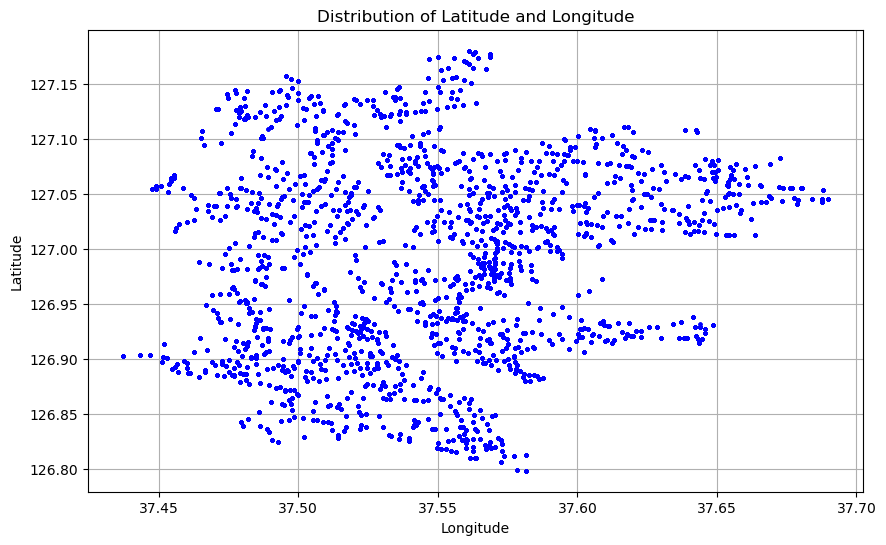

In [26]:
Plongitude_data = df['PLong']  
Platitude_data = df['PLatd']  


plt.figure(figsize=(10, 6))
plt.plot(Plongitude_data, Platitude_data, 'bo', markersize=2)  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Latitude and Longitude')
plt.grid(True)  
plt.show()

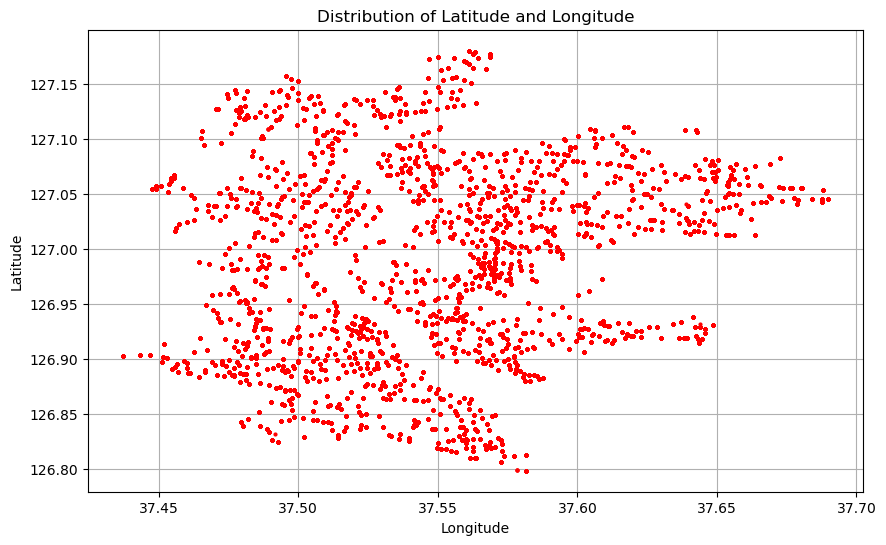

In [27]:

Dlongitude_data = df['DLong']  
Dlatitude_data = df['DLatd']  


plt.figure(figsize=(10, 6))
plt.plot(Dlongitude_data, Dlatitude_data, 'ro', markersize=2)  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Latitude and Longitude')
plt.grid(True)  
plt.show()

It can be seen that Pickup and dropoff latitude is in the range of (126.60–127.80) and pickup and dropoff longitude is in the range of (37.45–37.70). This proves that all the trips are executed within the Seoul city range and no potential outliers associated with latitude and longitude.

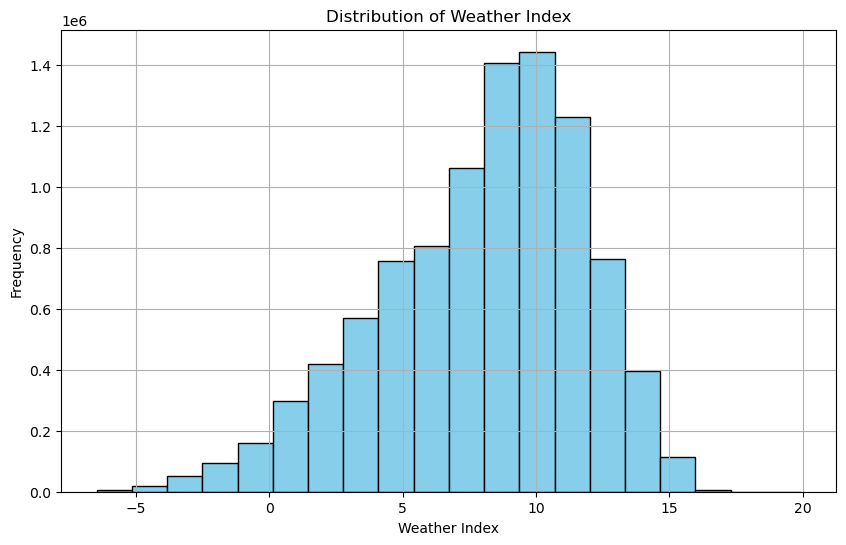

In [28]:

weight_temperature = 0.4
weight_precipitation = 0.3
weight_wind_speed = 0.3


df['Weather_Index'] = (weight_temperature * df['Temp']) + \
                           (weight_precipitation * df['Precip']) + \
                           (weight_wind_speed * df['Wind'])


plt.figure(figsize=(10, 6))
plt.hist(df['Weather_Index'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Weather Index')
plt.ylabel('Frequency')
plt.title('Distribution of Weather Index')
plt.grid(True)
plt.show()


Defining weight variables is to enable weighting of the impact of different weather characteristics on bicycle usage when calculating weather indices. When calculating the weather index, we usually assume that different weather characteristics have varying degrees of impact on bicycle usage. For example, temperature may have a greater impact on bicycle usage, while wind speed may have a relatively smaller impact on bicycle usage.

Therefore, by defining weight variables, we can weight the importance of different weather features and then combine them to calculate a comprehensive weather index, in order to better reflect the overall impact of weather on bicycle usage.

In the example code above, we defined the weight variables weight_temperature, weight_precipitation, and weight_wind_speed, which represent the relative importance of temperature, precipitation, and wind speed to the weather index, respectively. By using these weighted variables, we can calculate the weather index based on their relative importance, thereby more accurately reflecting the impact of different weather characteristics on bicycle usage.

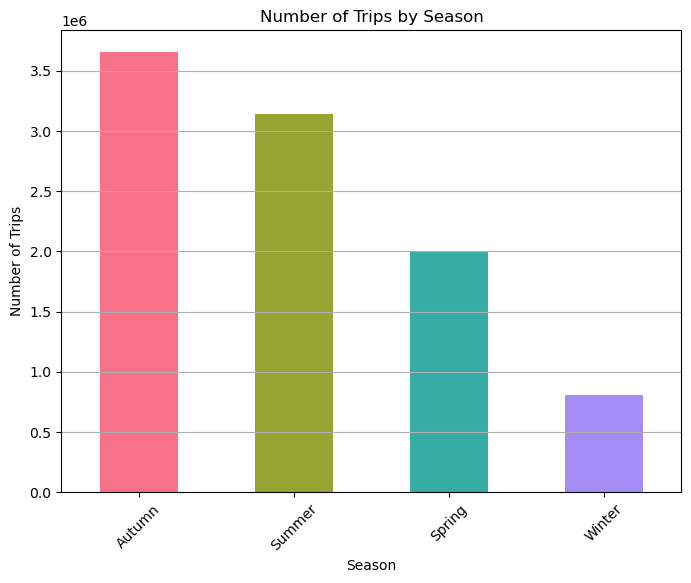

In [29]:
def map_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = df['Pmonth'].apply(map_season)


season_counts = df['Season'].value_counts()

colors = sns.color_palette('husl', len(season_counts))


plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color=colors)
plt.xlabel('Season')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Season')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


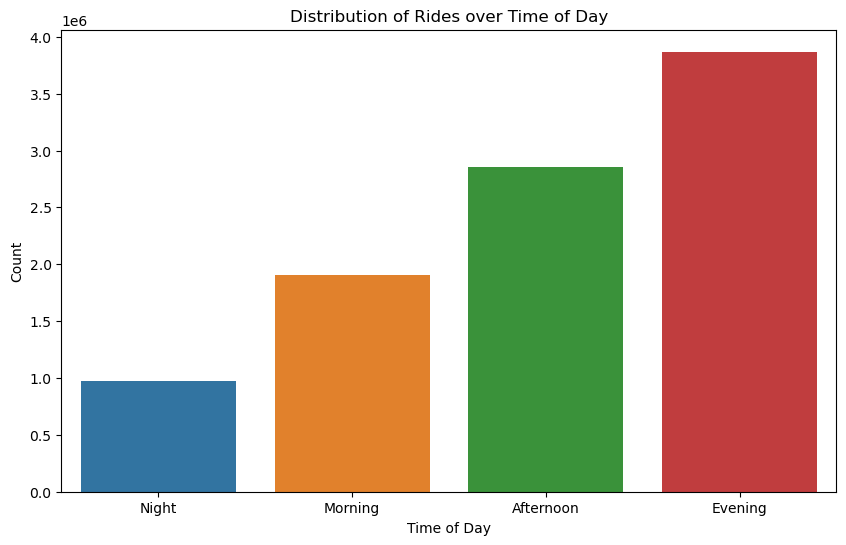

In [30]:

time_bins = pd.cut(df['Phour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
df['Time_of_Day'] = time_bins

plt.figure(figsize=(10, 6))
sns.countplot(x='Time_of_Day', data=df)
plt.title('Distribution of Rides over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Duration', axis=1), df['Duration'], test_size=0.2, random_state=42)

print("Training set:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nTesting set:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set:
X_train: (7680911, 28)
y_train: (7680911,)

Testing set:
X_test: (1920228, 28)
y_test: (1920228,)


In [32]:
missing_values_train = X_train.isnull().sum()
print("Missing values in training set：")
print(missing_values_train)

Missing values in training set：
Unnamed: 0       0
Distance         0
PLong            0
PLatd            0
DLong            0
DLatd            0
Haversine        0
Pmonth           0
Pday             0
Phour            0
Pmin             0
PDweek           0
Dmonth           0
Dday             0
Dhour            0
Dmin             0
DDweek           0
Temp             0
Precip           0
Wind             0
Humid            0
Solar            0
Snow             0
GroundTemp       0
Dust             0
Weather_Index    0
Season           0
Time_of_Day      0
dtype: int64


In [33]:
missing_values_test = X_test.isnull().sum()
print("\nMissing values in test set：")
print(missing_values_test)


Missing values in test set：
Unnamed: 0       0
Distance         0
PLong            0
PLatd            0
DLong            0
DLatd            0
Haversine        0
Pmonth           0
Pday             0
Phour            0
Pmin             0
PDweek           0
Dmonth           0
Dday             0
Dhour            0
Dmin             0
DDweek           0
Temp             0
Precip           0
Wind             0
Humid            0
Solar            0
Snow             0
GroundTemp       0
Dust             0
Weather_Index    0
Season           0
Time_of_Day      0
dtype: int64


Training set 80%, test set 20%、

We don’t have missing values,so we don’t need to fill or drop features (or samples) with missing values.

In [34]:
# Convert only numeric columns to 'float32'
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')

# Round the datasets to 1 decimal place for numeric columns
X_train_rounded = X_train.round(1)
X_test_rounded = X_test.round(1)

# Print the rounded training and test sets
print("Rounded Training Set:")
print(X_train_rounded)

print("\nRounded Test Set:")
print(X_test_rounded)


Rounded Training Set:
         Unnamed: 0  Distance      PLong       PLatd      DLong       DLatd  \
1020427   1041581.0    8480.0  37.500000  127.000000  37.500000  127.099998   
5898274   6048823.0    4610.0  37.500000  127.099998  37.500000  127.099998   
727168     741183.0    7470.0  37.599998  126.800003  37.599998  126.900002   
6495708   6661523.0     890.0  37.599998  127.099998  37.599998  127.099998   
4925003   5048681.0    5180.0  37.700001  127.000000  37.700001  127.000000   
...             ...       ...        ...         ...        ...         ...   
9524682   9753486.0    2680.0  37.599998  127.099998  37.599998  127.099998   
2234489   2296024.0    2020.0  37.500000  126.900002  37.500000  126.900002   
4304572   4415107.0     550.0  37.500000  126.900002  37.500000  126.900002   
6550634   6719000.0    2520.0  37.500000  127.099998  37.500000  127.099998   
6423388   6586293.0     680.0  37.599998  127.000000  37.599998  127.000000   

         Haversine  Pmonth  P

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder_season = LabelEncoder()
label_encoder_time_of_day = LabelEncoder()

X_train['Season'] = label_encoder_season.fit_transform(X_train['Season'])

X_train['Time_of_Day'] = label_encoder_time_of_day.fit_transform(X_train['Time_of_Day'])
print("Transformed Training Set:")
print(X_train)

Transformed Training Set:
         Unnamed: 0  Distance      PLong       PLatd      DLong       DLatd  \
1020427   1041581.0    8480.0  37.530167  127.007439  37.535221  127.068398   
5898274   6048823.0    4610.0  37.512104  127.107780  37.531013  127.142365   
727168     741183.0    7470.0  37.557968  126.838287  37.557461  126.861458   
6495708   6661523.0     890.0  37.610523  127.059799  37.615299  127.064468   
4925003   5048681.0    5180.0  37.653015  127.046997  37.653015  127.046997   
...             ...       ...        ...         ...        ...         ...   
9524682   9753486.0    2680.0  37.551224  127.089706  37.568649  127.086250   
2234489   2296024.0    2020.0  37.470230  126.895073  37.484940  126.901321   
4304572   4415107.0     550.0  37.519363  126.926048  37.522079  126.930367   
6550634   6719000.0    2520.0  37.505802  127.109718  37.502594  127.127647   
6423388   6586293.0     680.0  37.557201  126.955666  37.553001  126.956688   

         Haversine  Pmont

In [36]:
label_encoder = LabelEncoder()
features_to_scale = ['Distance', 'Precip', 'GroundTemp', 'Haversine', 'Season','Time_of_Day']
X_test['Season'] = label_encoder_season.transform(X_test['Season'])
X_test['Time_of_Day'] = label_encoder_time_of_day.transform(X_test['Time_of_Day'])

In [37]:
print(X_test)

         Unnamed: 0  Distance      PLong       PLatd      DLong       DLatd  \
7575138   7773438.0    5060.0  37.556610  126.898018  37.573112  126.922447   
730271     744376.0     800.0  37.552746  126.918617  37.557499  126.923805   
5296864   5430397.0   17170.0  37.521282  126.973465  37.521282  126.973465   
6836061   7013746.0    2800.0  37.473728  126.918404  37.481602  126.892799   
6092272   6247205.0    3020.0  37.602627  127.041634  37.596020  127.059830   
...             ...       ...        ...         ...        ...         ...   
8478536   8694357.0   12100.0  37.488991  126.916382  37.488991  126.916382   
5263326   5395872.0    4160.0  37.511944  127.091217  37.508968  127.125839   
4146700   4254110.0    5150.0  37.471165  126.937019  37.484577  126.929916   
9504004   9732636.0    4980.0  37.517288  127.114197  37.529675  127.119789   
5594085   5735776.0    3680.0  37.603043  127.033272  37.586899  127.020752   

         Haversine  Pmonth  Pday  Phour  Pmin  PDwe

To use machine learning models from the sklearn library, it's important to ensure that the features in the dataset are numeric and handle any missing values present.

All features in the data are numerical and have no missing values


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
baseline_model = DummyRegressor(strategy="mean")

# Fit the baseline model using the training data
baseline_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = baseline_model.predict(X_test)

print("Predicted values using the baseline model (mean):", y_pred)

# Print the mean constant used by the baseline model
print("Mean value (constant) used by the baseline model:", baseline_model.constant_)

Predicted values using the baseline model (mean): [25.8015419 25.8015419 25.8015419 ... 25.8015419 25.8015419 25.8015419]
Mean value (constant) used by the baseline model: [[25.8015419]]


Regression Metrics:
MAE: 19.19471931722736
MSE: 627.2483246998157
RMSE: 25.044926126858822
R-squared: -7.759916531568933e-08


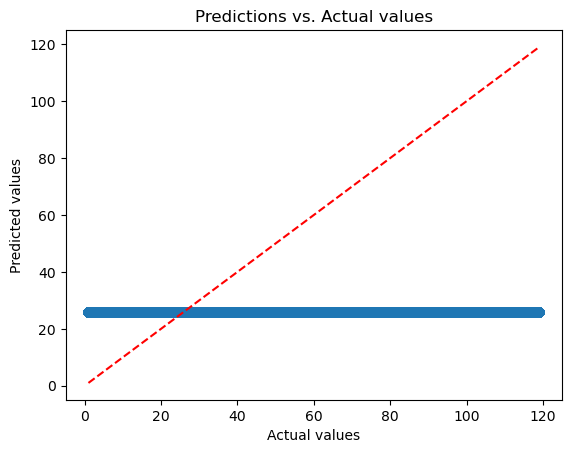

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Regression Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# Visual analysis: Plot predictions versus actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predictions vs. Actual values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal fit line
plt.show()

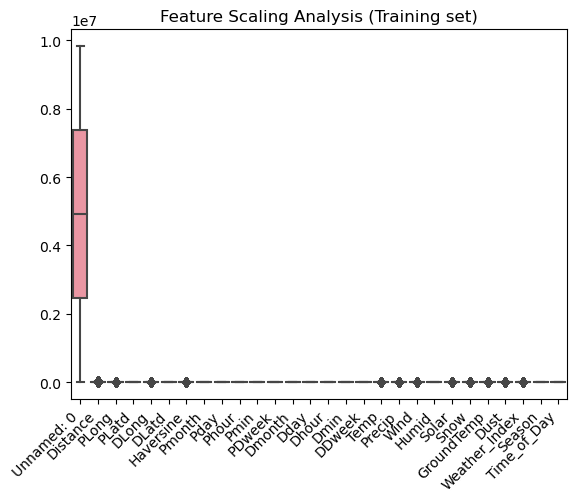

In [40]:
sns.boxplot(data=X_train)
plt.xticks(rotation=45, ha='right') 
plt.title("Feature Scaling Analysis (Training set)")
plt.show()

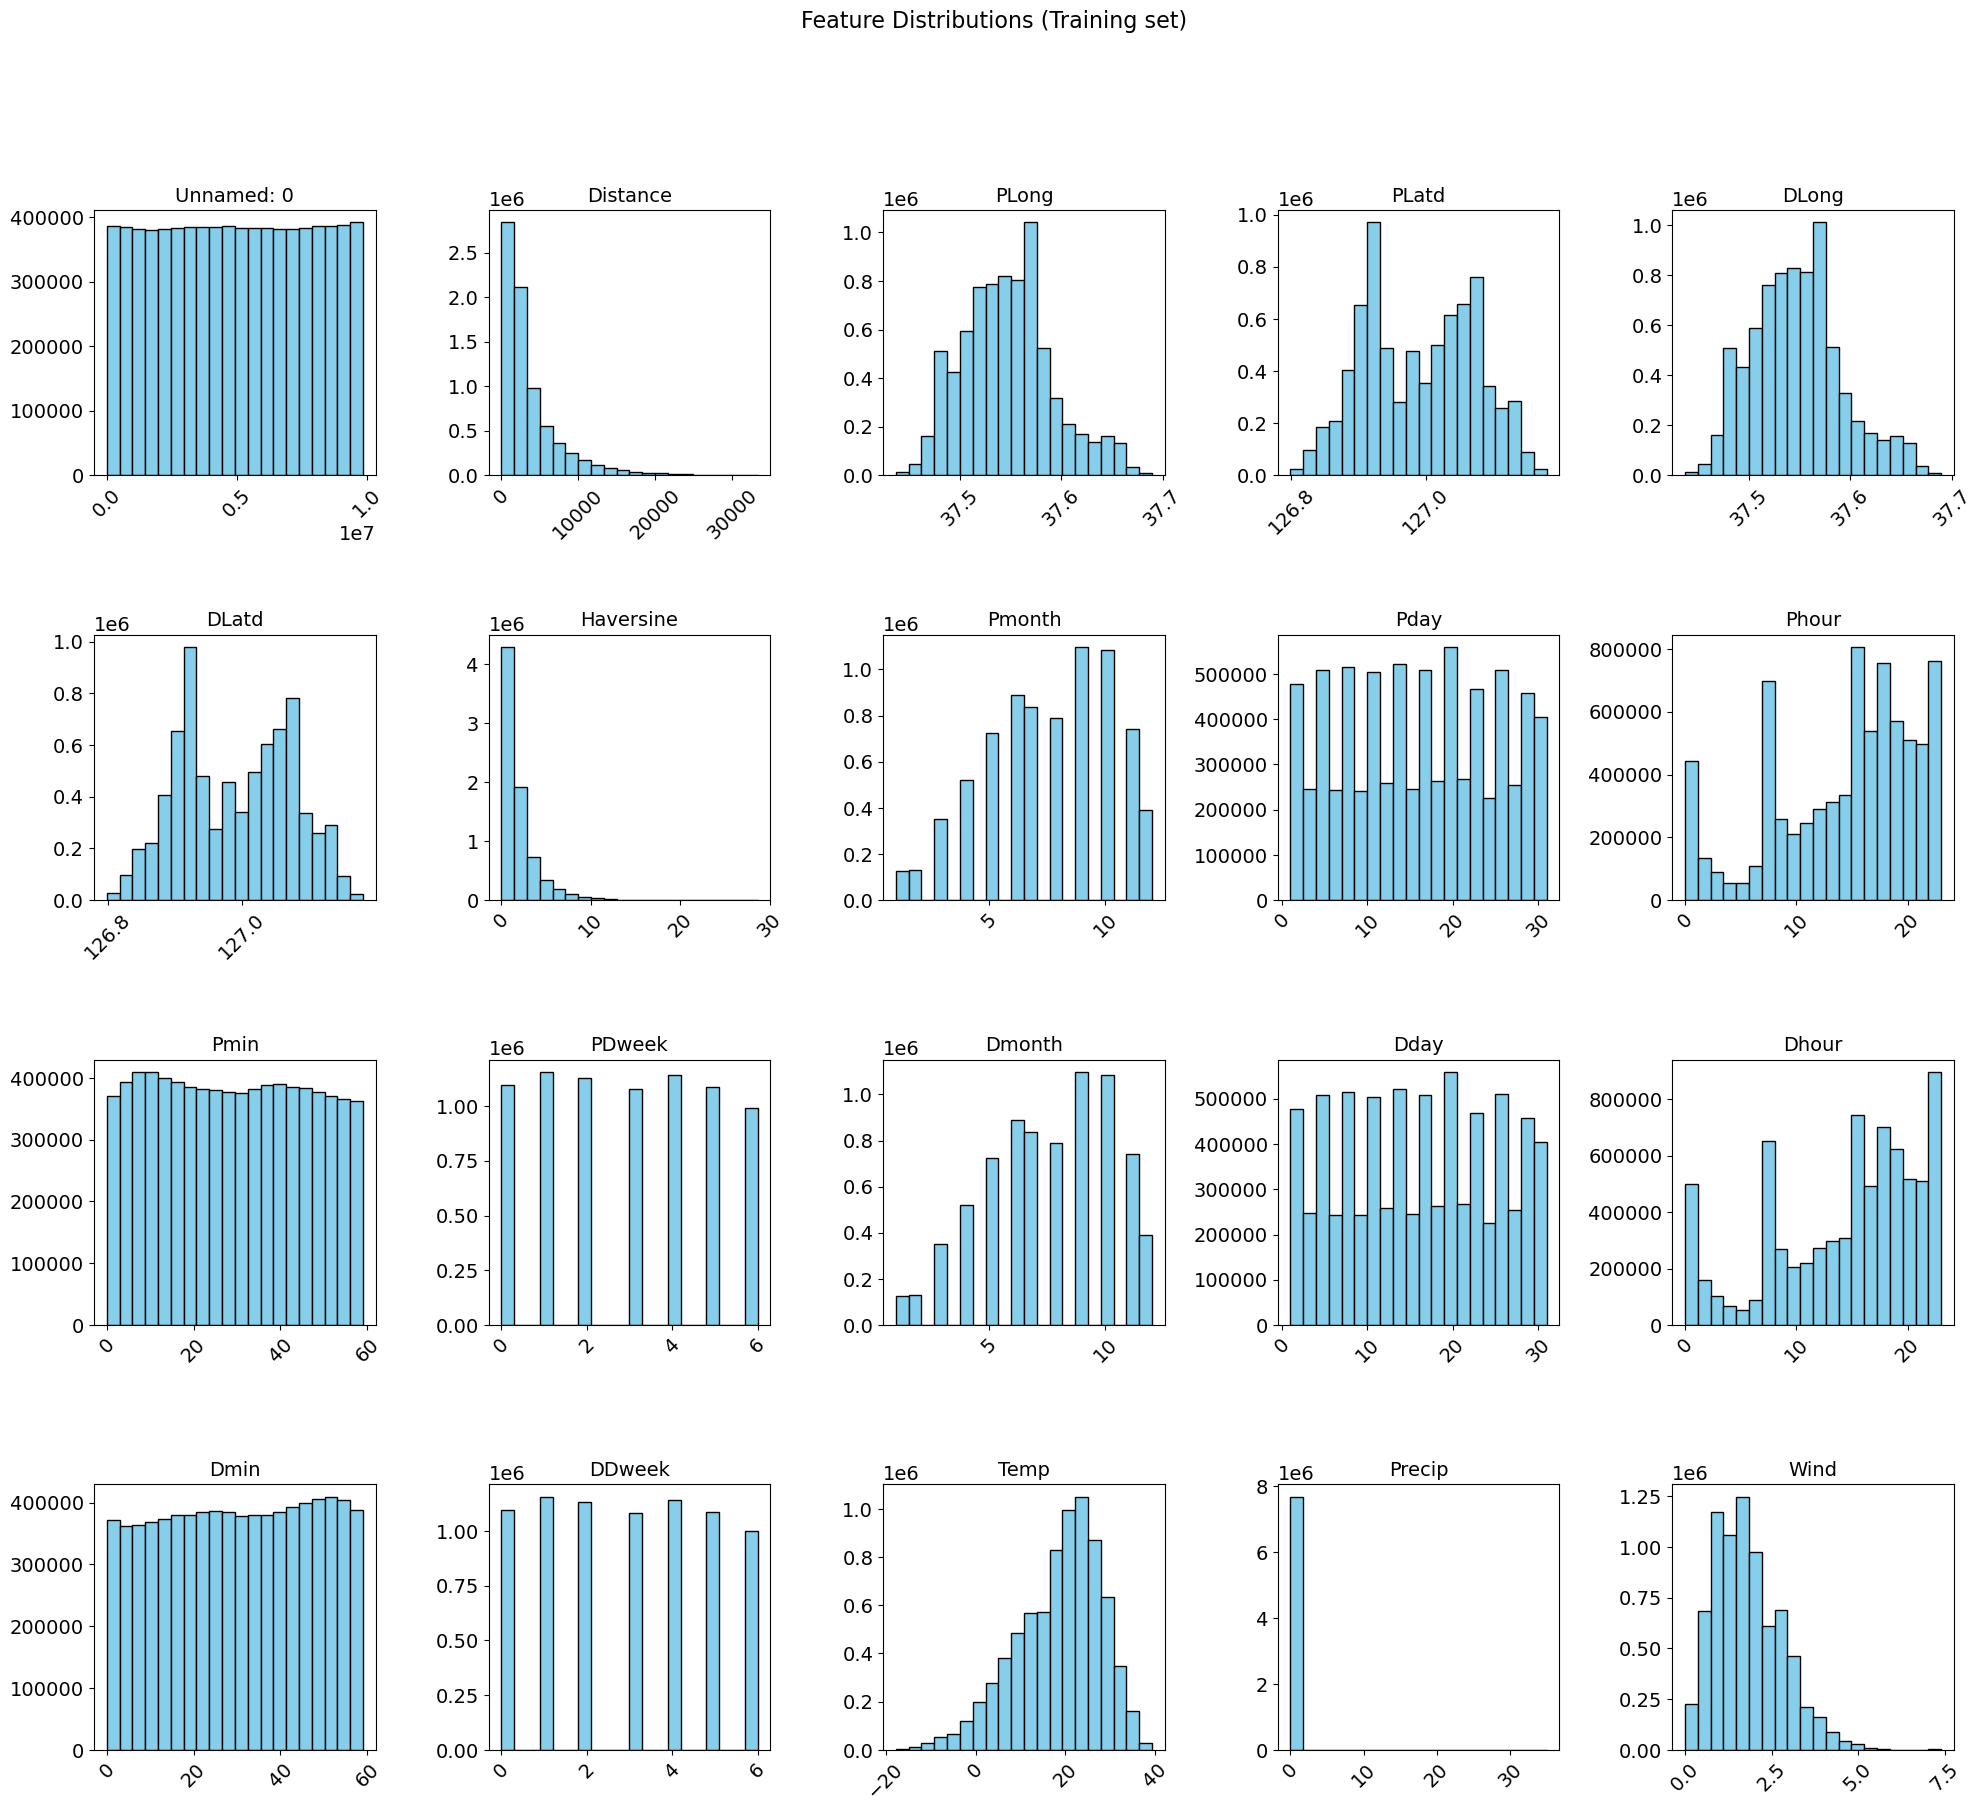

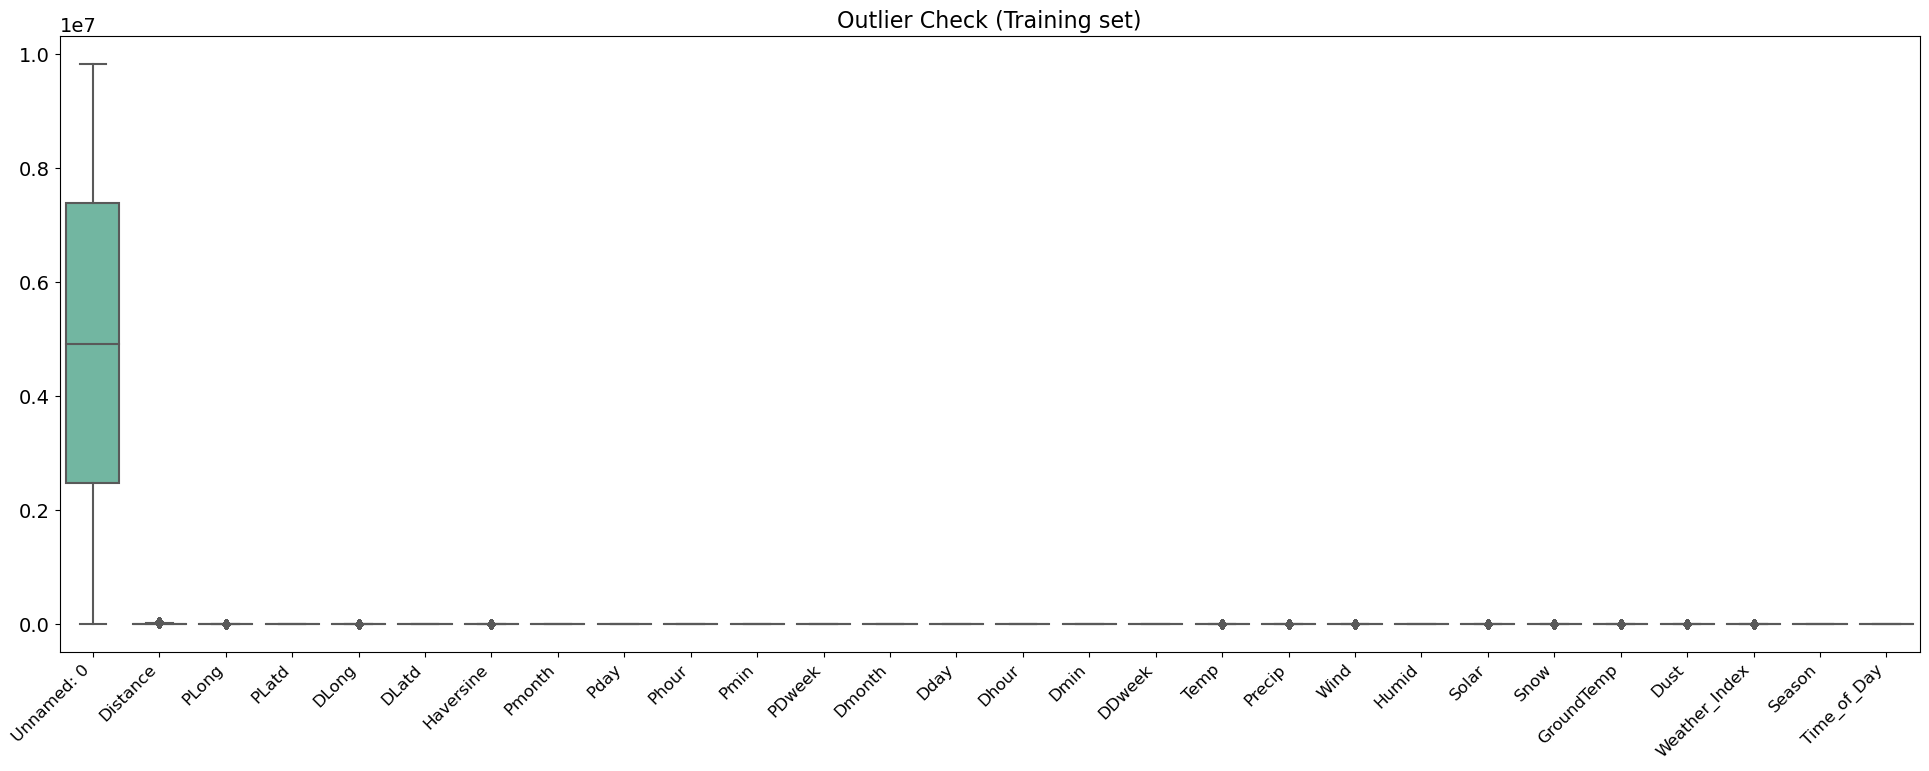

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train is your DataFrame
# X_train = pd.read_csv('path_to_your_data.csv')  # Load your data here

# Set larger plot dimensions and font settings for clearer readability
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 12})

# Histograms
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 20))  # Adjust grid and size
fig.subplots_adjust(hspace=0.6, wspace=0.4)  # Increase spacing

# Plot each histogram on a separate subplot
for ax, feature in zip(axes.flatten(), X_train.columns):
    ax.hist(X_train[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(feature)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better legibility

fig.suptitle('Feature Distributions (Training set)', fontsize=16)
plt.show()

# Boxplot
plt.figure(figsize=(24, 8))  # Larger figure for the boxplot
sns.boxplot(data=X_train, palette='Set2')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Enhance font size and alignment
plt.title("Outlier Check (Training set)", fontsize=16)
plt.show()


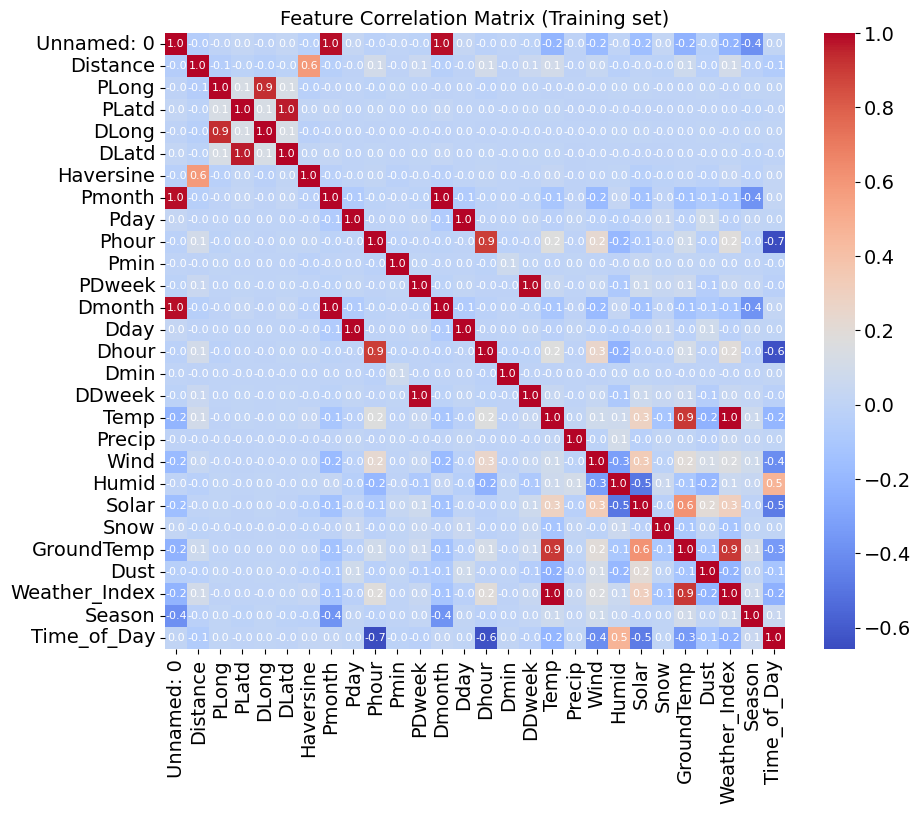

In [42]:
correlation_matrix = X_train.corr()

# Set up a larger plot to avoid crowding
plt.figure(figsize=(10, 8))  # Increase the plot size

# Create the heatmap with smaller text for annotations, fewer decimal places, and white text for better contrast
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"color": 'white', "size": 8})

# Set the title for the heatmap
plt.title("Feature Correlation Matrix (Training set)")

# Display the plot
plt.show()

# Linear Regression Model

In [43]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assume X_train, y_train, X_test, y_test are defined
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Further reduce the sample size for GridSearchCV
X_train_sample = X_train.sample(frac=0.3, random_state=42)  # Reduce fraction as needed
y_train_sample = y_train.loc[X_train_sample.index]

# Simplified hyperparameter grid and pipeline setup
param_grid = {
    "linear_regressor__fit_intercept": [True]
}
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_regressor", LinearRegression())
])

# Setting up GridSearchCV
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# Output results
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
mae_l = mean_absolute_error(y_test, y_pred)
mse_l = mean_squared_error(y_test, y_pred)
rmse_l = np.sqrt(mse_l)
r2_l = r2_score(y_test, y_pred)
print("Optimized Linear Regression Model Metrics:")
print("MAE:", mae_l)
print("MSE:", mse_l)
print("RMSE:", rmse_l)
print("R-squared:", r2_l)
print("Best Hyperparameters:", grid_search.best_params_)

# Cross-validation
cv_results = cross_val_score(best_pipeline, X_train_sample, y_train_sample, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross-Validation MSE:", -cv_results.mean())


Optimized Linear Regression Model Metrics:
MAE: 10.102325949866728
MSE: 271.00698011776603
RMSE: 16.462289637768073
R-squared: 0.5679430450812631
Best Hyperparameters: {'linear_regressor__fit_intercept': True}
Cross-Validation MSE: 269.70428466796875


# Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_test, y_test are defined and loaded with appropriate types
# Further reduce the dataset size for training
X_train_sample = X_train.sample(frac=0.1, random_state=42)  # Adjust fraction as needed
y_train_sample = y_train.loc[X_train_sample.index]

# Define the model with even lower complexity
rf_regressor = RandomForestRegressor(
    n_estimators=5,  # Further reduced number of trees
    max_depth=3,  # Further reduced depth
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model
rf_regressor.fit(X_train_sample, y_train_sample)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate and display regression metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Simplified Random Forest Model Metrics:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R-squared: {r2_rf}")

# Attempt cross-validation with reduced sample size
kfold = KFold(n_splits=2, shuffle=True, random_state=42)  # Further reduced folds
cv_results = cross_val_score(rf_regressor, X_train_sample, y_train_sample, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross-Validation MSE:", -np.nanmean(cv_results))


Simplified Random Forest Model Metrics:
MAE: 9.508413638871685, MSE: 235.1627959621629, RMSE: 15.335018616296587, R-squared: 0.6250881748896783
Cross-Validation MSE: 234.60231649277728


# Integrating LightGBM

In [45]:
!pip install lightgbm

In [46]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming the data is already loaded into X_train, X_test, y_train, y_test
# Sanitize feature names to avoid issues with LightGBM
X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# Initialize LightGBM Regressor
lgbm_regressor = lgb.LGBMRegressor(
    num_leaves=31,
    max_depth=-1,  # No limit, can be tuned
    learning_rate=0.1,
    n_estimators=100,  # Standard number of trees
    random_state=42
)

# Fit the model on the same sample as used for the RandomForest and Linear Regression
X_train_sample = X_train.sample(frac=0.1, random_state=42)  # Consistent fraction as used in RF
y_train_sample = y_train.loc[X_train_sample.index]

# Fit LightGBM on the sampled data
lgbm_regressor.fit(X_train_sample, y_train_sample)

# Predictions on the test set
y_pred_lgbm = lgbm_regressor.predict(X_test)

# Evaluation
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM Model Metrics:")
print(f"MAE: {mae_lgbm}, MSE: {mse_lgbm}, RMSE: {rmse_lgbm}, R-squared: {r2_lgbm}")

# Cross-validation to check model robustness
kfold = KFold(n_splits=2, shuffle=True, random_state=42)  # Using the same folds as in RF
cv_results_lgbm = cross_val_score(lgbm_regressor, X_train_sample, y_train_sample, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross-Validation MSE (LightGBM):", -np.mean(cv_results_lgbm))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3474
[LightGBM] [Info] Number of data points in the train set: 768091, number of used features: 28
[LightGBM] [Info] Start training from score 25.810084
LightGBM Model Metrics:
MAE: 5.533924641202574, MSE: 87.32058954440895, RMSE: 9.344548653862793, R-squared: 0.8607878365204035
Cross-Validation MSE (LightGBM): 88.11607262553832


# Exhaustive Evaluation for the LightGBM model

# Feature Importances

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.227719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3474
[LightGBM] [Info] Number of data points in the train set: 768091, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 25.810084


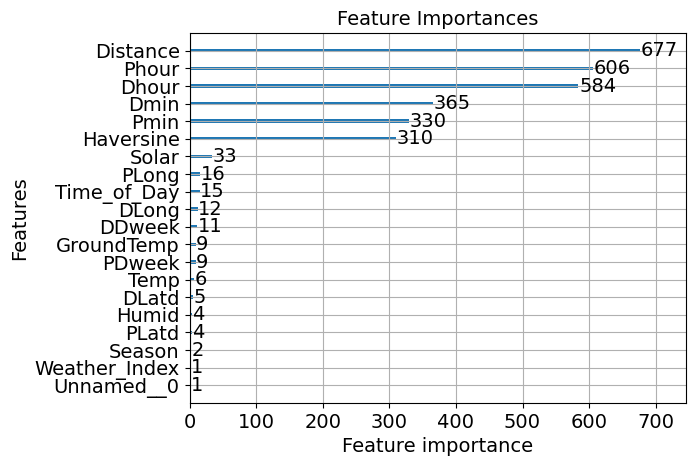

In [47]:
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import learning_curve, cross_val_score

# Initialize the LightGBM regressor
lgbm_regressor = lgb.LGBMRegressor(
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,  # Standard number of boosting rounds
    min_child_samples=20,
    boosting_type='goss',
    random_state=42
)

# Fit the model
lgbm_regressor.fit(X_train_sample, y_train_sample)

# Plot feature importances
lgb.plot_importance(lgbm_regressor, max_num_features=30, importance_type='split')
plt.title('Feature Importances')
plt.show()

# Cross-validation to evaluate the model's reliability

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3454
[LightGBM] [Info] Number of data points in the train set: 61447, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 25.866145
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=gos

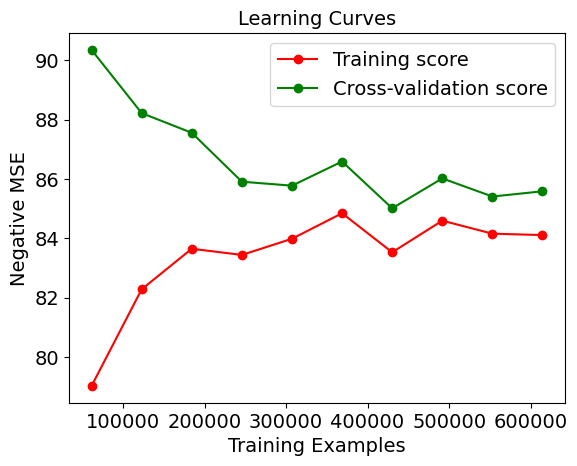

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3476
[LightGBM] [Info] Number of data points in the train set: 614472, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 25.808519
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=go

In [48]:
# Generate learning curves to assess overfitting
train_sizes, train_scores, val_scores = learning_curve(
    lgbm_regressor, X_train_sample, y_train_sample, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plotting learning curves
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Negative MSE')
plt.legend(loc="best")
plt.show()

# Cross-validation 
cv_mse = cross_val_score(lgbm_regressor, X_train_sample, y_train_sample, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE: ", -np.mean(cv_mse))


# Comparison Summary:
#1. Error Metrics (MAE, MSE, RMSE)
LightGBM shows significantly lower MAE, MSE, and RMSE values than both the Linear Regression and Random Forest models. This indicates that LightGBM has a higher prediction accuracy on this dataset.


#2. R-squared
The R-squared value for LightGBM is substantially higher (0.861) compared to both Linear Regression (0.568) and Random Forest (0.625). This implies that LightGBM explains a greater proportion of variance in the dependent variable, showing a better fit to the data.


#3. Cross-Validation MSE
Although all models show reasonable generalization based on cross-validation MSE, LightGBM again comes out on top with the lowest value (88.116) compared to Linear Regression (269.704) and Random Forest (234.602). This suggests that LightGBM is more robust and generalizes better to new data.
Conclusion:

LightGBM is the superior model for this dataset across all evaluated criteria: it minimizes error metrics, maximizes explanatory power, and generalizes better to unseen data compared to both the optimized Linear Regression and the simplified Random Forest models. 

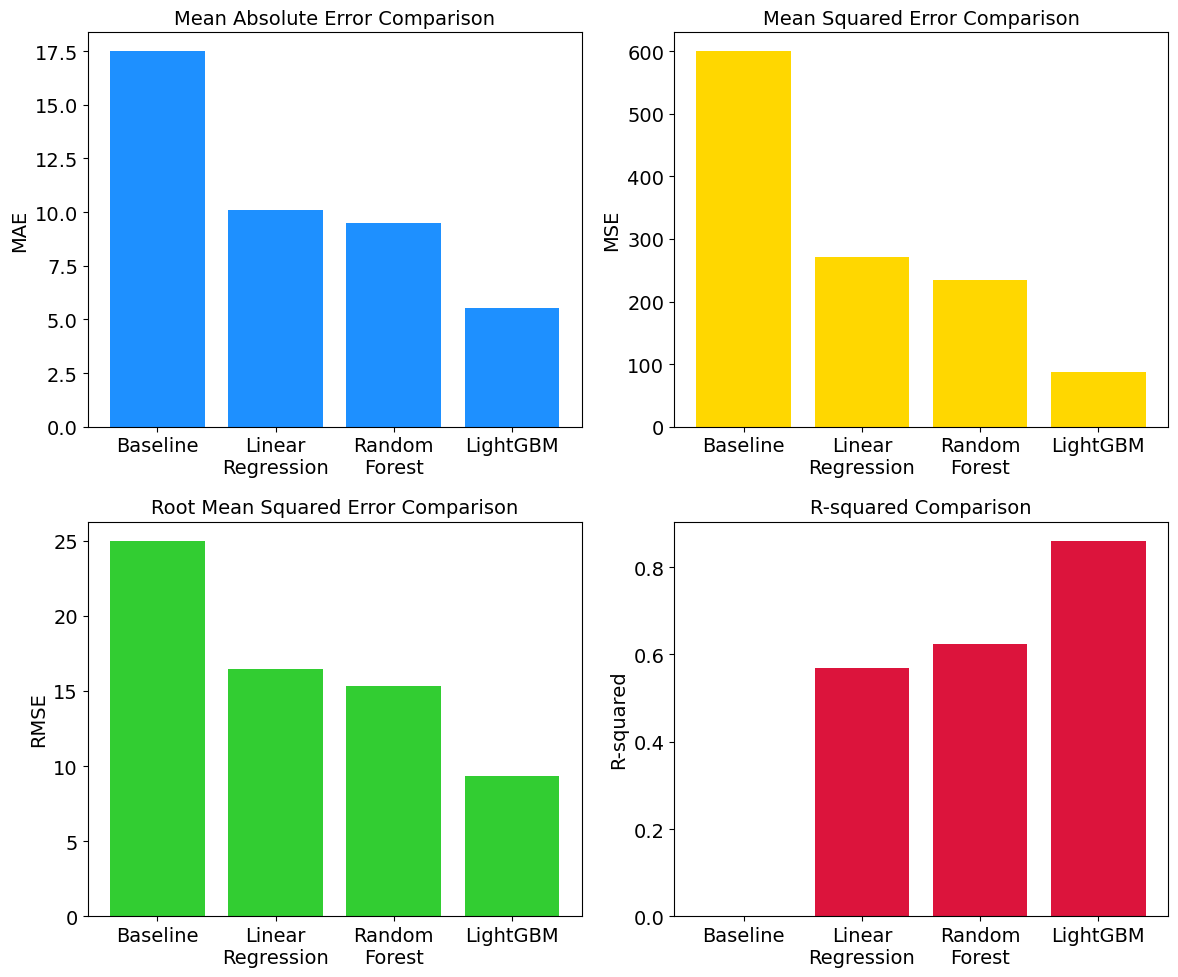

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
models = ['Baseline', 'Linear\nRegression', 'Random\nForest', 'LightGBM']  # Use line breaks for better label readability
mae = [17.5, 10.102, 9.508, 5.534]  # MAE values
mse = [600, 271.007, 235.163, 87.321]  # MSE values
rmse = [25, 16.462, 15.335, 9.345]  # RMSE values
r_squared = [0, 0.568, 0.625, 0.861]  # R-squared values

# Create subplots in a 2x2 grid, adjusted size for better fitting
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# MAE Comparison
ax[0, 0].bar(models, mae, color='dodgerblue')
ax[0, 0].set_title('Mean Absolute Error Comparison')
ax[0, 0].set_ylabel('MAE')
ax[0, 0].tick_params(axis='x', labelrotation=0)  # Prevent rotation for clearer reading

# MSE Comparison
ax[0, 1].bar(models, mse, color='gold')
ax[0, 1].set_title('Mean Squared Error Comparison')
ax[0, 1].set_ylabel('MSE')
ax[0, 1].tick_params(axis='x', labelrotation=0)

# RMSE Comparison
ax[1, 0].bar(models, rmse, color='limegreen')
ax[1, 0].set_title('Root Mean Squared Error Comparison')
ax[1, 0].set_ylabel('RMSE')
ax[1, 0].tick_params(axis='x', labelrotation=0)

# R-squared Comparison
ax[1, 1].bar(models, r_squared, color='crimson')
ax[1, 1].set_title('R-squared Comparison')
ax[1, 1].set_ylabel('R-squared')
ax[1, 1].tick_params(axis='x', labelrotation=0)

# Layout adjustment to prevent label overlap
plt.tight_layout()
plt.show()
